In [136]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter("ignore")

#load the data
data = pd.read_csv("./bank_marketing_data/bank_marketing_data/bank-additional-full.csv")
print ("Total Data: ", data.shape[0], "\nTotal Features: ", data.shape[1])
data.head()

Total Data:  41188 
Total Features:  21


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1.Basic of Data

In [137]:
#查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [138]:
#查看数据信息
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE05F60348>,
      dtype=object)

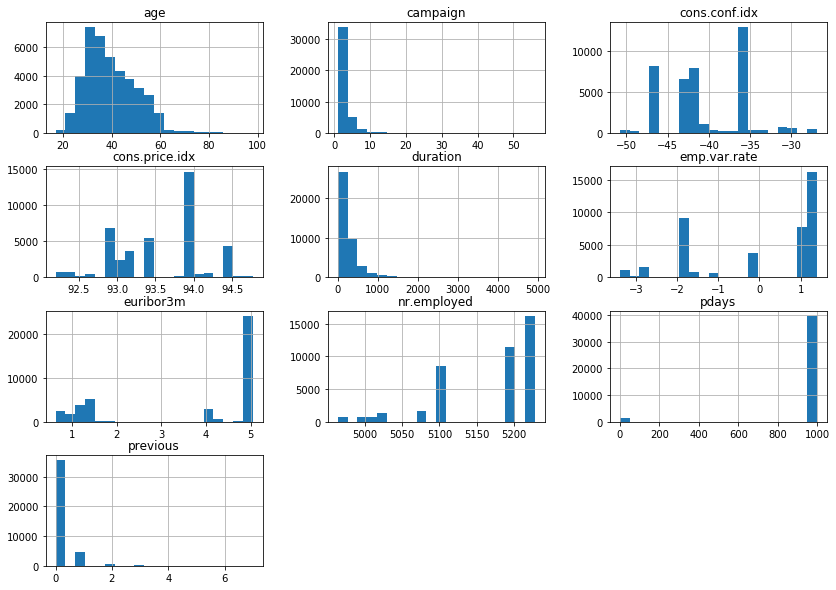

In [139]:
# 数据项的分布
data.hist(bins=20,figsize=(14,10))

['no' 'yes']
y
no     36548
yes     4640
dtype: int64


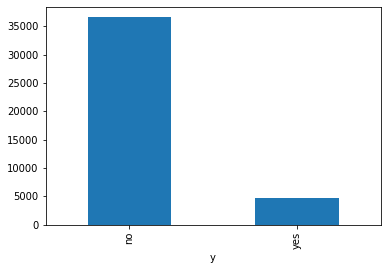

In [140]:
# label
print(data['y'].unique())
data_y_count = data.groupby(by="y").size()
print(data_y_count)
data_y_count.plot.bar()
plt.show()
data['y'] = data['y'].map({'no': 0, 'yes': 1}).astype(int)

### 2. Data Preprocessing

- handle missing values  

  对于缺失值(unknown)较少的属性，包括job和marital，直接将含有缺失值的行删除  
  对于缺失值(unknown)较多的属性，使用该属性的众数对其进行预测

In [141]:
#get missing values information
data2 = data
data2=data2.replace(to_replace='unknown',value=np.nan)
missing_values_count = data2.isnull().sum()
print(missing_values_count)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [142]:
#remove the job and marital rows that contain a missing value
data2 = data2.dropna(how='any',subset={'job','marital'})
print ("Total data: ", data2.shape[0])

Total data:  40787


In [143]:
#predict the missing values in education,default,housing,loan by mode
missing_columns = ['education','default','housing','loan']

#统计含有缺失值的列的分布情况
for i in missing_columns:
    data_count = data2.groupby(by=i).size()
    print(data_count)
    print('\n')

education
basic.4y                4118
basic.6y                2264
basic.9y                6006
high.school             9464
illiterate                18
professional.course     5225
university.degree      12096
dtype: int64


default
no     32348
yes        3
dtype: int64


housing
no     18427
yes    21376
dtype: int64


loan
no     33620
yes     6183
dtype: int64




In [144]:
#用各自列的众数填充缺失值
data2=data2.fillna({'education':"university.degree",'default':"no",'housing':"yes",'loan':"no"})
missing_values_count = data2.isnull().sum()
print(missing_values_count)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### 3. Feature Engineering  

 - 分类属性数值化  
  (1)二分类属性编码  
  (2)有序分类属性编码  
  (3)无序分类属性编码

In [145]:
# 二分类属性编码
# default 、housing 和loan 为二分类变量，对其进行0，1编码。
binary_mapping={'yes':1,'no':0}
data2['default'] = data2['default'].map(binary_mapping)
data2['housing'] = data2['housing'].map(binary_mapping)
data2['loan'] = data2['loan'].map(binary_mapping)

In [146]:
# 有序分类属性编码
# education,poutcome属性
data2['education'] = data2['education'].map({'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4,\
                                           'high.school':5, 'professional.course':6, 'university.degree':7})
data2['poutcome'] = data2['poutcome'].map({'nonexistent':0, 'success':1, 'failure':-1})

In [147]:
# 无序分类属性编码 
# 属性job，marital，contact，month，day_of_week为无序分类变量
data2 = pd.concat([data2, pd.get_dummies(data2["job"], prefix = "J_"), 
                      pd.get_dummies(data2["marital"], prefix = "M_"), 
                      pd.get_dummies(data2["contact"], prefix = "C_"), 
                      pd.get_dummies(data2["month"], prefix = "M_"), 
                      pd.get_dummies(data2["day_of_week"], prefix = "D_")], axis = 1)
data2 = data2.drop(["job", "marital", "contact", "month", "day_of_week"], axis = 1)

- 连续属性离散化  
  duration属性75%分位数为319，最大值为4918，取值间隔过大，采用分箱法将其离散化

In [148]:
data2['duration']=pd.qcut(data2['duration'], q=4, labels=[1,2,3,4])

In [149]:
# data = data.drop(['duration'],axis=1)
print("rows:",data2.shape[0], "\tcols:",data2.shape[1])

rows: 40787 	cols: 47


- 规范化

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data2_X = data2.drop(['y'], axis=1)
data2_Y = data2['y']
scaler = StandardScaler()
data2_X = scaler.fit_transform(data2_X)
data2_X = pd.DataFrame(data2_X,columns=columns)
missing_values_count = data2_X.isnull().sum()
print(missing_values_count)

age                 0
education           0
default             0
housing             0
loan                0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
J__admin.           0
J__blue-collar      0
J__entrepreneur     0
J__housemaid        0
J__management       0
J__retired          0
J__self-employed    0
J__services         0
J__student          0
J__technician       0
J__unemployed       0
M__divorced         0
M__married          0
M__single           0
C__cellular         0
C__telephone        0
M__apr              0
M__aug              0
M__dec              0
M__jul              0
M__jun              0
M__mar              0
M__may              0
M__nov              0
M__oct              0
M__sep              0
D__fri              0
D__mon              0
D__thu              0
D__tue              0
D__wed    

### 4.Classification

#### Preparation  
- 数据集的划分

In [151]:
from sklearn.model_selection import train_test_split
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data2_X, data2_Y, test_size = 0.3, random_state = 300)
print(X_train.shape, X_test.shape)

(28550, 46) (12237, 46)


- 训练集重采样

In [152]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_sample(X_train, y_train)

#### 4.1 Logisitic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_smo, y_smo)

# Prediction & Evaluation
y_predict = logreg.predict(X_test)
y_predict_proba = logreg.predict_proba(X_test)   #每一类的概率

# Logistic Regression score & auc
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test), 5))
auc = metrics.roc_auc_score(y_test, y_predict_proba[:, 1])
print("Logistic regression auc for test set: ", auc)
print("\nClassification report:")
print(classification_report(y_test, y_predict))

Logistic regression score for test set: 0.80706
Logistic regression auc for test set:  0.9117405606912601

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     10849
           1       0.36      0.88      0.51      1388

    accuracy                           0.81     12237
   macro avg       0.67      0.84      0.69     12237
weighted avg       0.91      0.81      0.84     12237



In [156]:
# Fitting a logistic regression model with l1 penalty
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg.fit(X_smo, y_smo)

# Prediction & Evaluation
y_predict = logreg.predict(X_test)

# Logistic Regression score
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test), 5))
print("\nClassification report:")
print(classification_report(y_test, y_predict))

Logistic regression score for test set: 0.80698

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     10849
           1       0.36      0.88      0.51      1388

    accuracy                           0.81     12237
   macro avg       0.67      0.84      0.69     12237
weighted avg       0.91      0.81      0.84     12237



- 比较原训练集与重采样后的训练集对模型产生的结果

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Prediction & Evaluation
y_predict = logreg.predict(X_test)
y_predict_proba = logreg.predict_proba(X_test)   #每一类的概率
# Logistic Regression score
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test), 5))
auc = metrics.roc_auc_score(y_test, y_predict_proba[:, 1])
print("Logistic regression auc for test set: ", auc)
print("\nClassification report:")
print(classification_report(y_test, y_predict))

Logistic regression score for test set: 0.90798
Logistic regression auc for test set:  0.9119340073840455

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10849
           1       0.69      0.35      0.46      1388

    accuracy                           0.91     12237
   macro avg       0.80      0.66      0.71     12237
weighted avg       0.89      0.91      0.89     12237



#### 4.2 Decision Tree
- learning

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_smo, y_smo)

# Prediction & Evaluation
y_predict = dt.predict(X_test)

# Decision Tree score
print("Decision tree score for test set:", round(dt.score(X_test, y_test), 5))
print("\nClassification report:")
print(classification_report(y_test, y_predict))

Decision tree score for test set: 0.84506

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     10849
           1       0.40      0.71      0.51      1388

    accuracy                           0.85     12237
   macro avg       0.68      0.79      0.71     12237
weighted avg       0.90      0.85      0.86     12237



- visualization

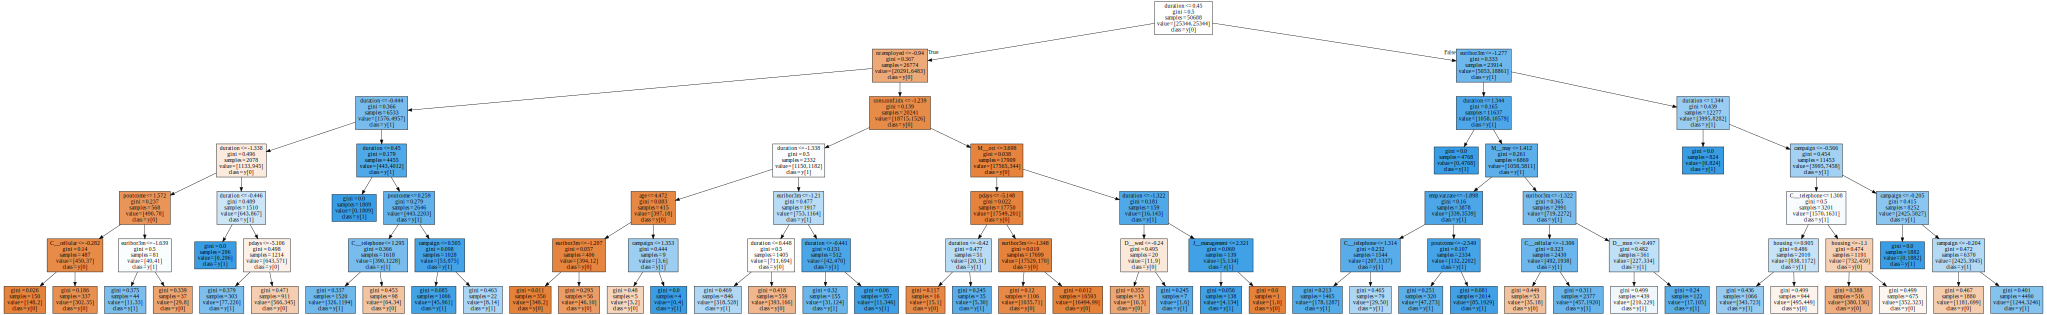

In [159]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, feature_names =columns, filled = True, class_names = True)  
graph = graphviz.Source(dot_data)  
graph

- 比较原训练集产生的模型

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train, y_train)
# Prediction & Evaluation
y_predict = dt.predict(X_test)
# Decision Tree score
print("Decision tree score for test set:", round(dt.score(X_test, y_test), 5))
print("\nClassification report:")
print(classification_report(y_test, y_predict))

Decision tree score for test set: 0.9061

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10849
           1       0.69      0.31      0.43      1388

    accuracy                           0.91     12237
   macro avg       0.80      0.65      0.69     12237
weighted avg       0.89      0.91      0.89     12237



#### 4.3 SVM

In [161]:
from sklearn.svm import LinearSVC
svc = LinearSVC(loss = "hinge")
svc.fit(X_smo, y_smo)

# Prediction & Evaluation
y_predict = svc.predict(X_test)

# SVC score
print("SVC score for test set:", round(svc.score(X_test, y_test), 5))
print("\nClassification report:")
print(classification_report(y_test, y_predict))

SVC score for test set: 0.77388

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     10849
           1       0.32      0.92      0.48      1388

    accuracy                           0.77     12237
   macro avg       0.66      0.84      0.67     12237
weighted avg       0.91      0.77      0.81     12237



#### 4.4 Naive Bayes

In [163]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
nb = BernoulliNB()
nb.fit(X_smo, y_smo)

# Prediction & Evaluation
y_predict = nb.predict(X_test)

# Naive Bayes score
print("Naive Bayes score for test set:", round(nb.score(X_test, y_test), 5))
print("\nClassification report:")
print(classification_report(y_test, y_predict))

Naive Bayes score for test set: 0.74593

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10849
           1       0.27      0.72      0.39      1388

    accuracy                           0.75     12237
   macro avg       0.61      0.74      0.62     12237
weighted avg       0.88      0.75      0.79     12237



#### 4.5 KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Fitting a K-NN model with default parameters
knn = KNeighborsClassifier()
knn.fit(X_smo, y_smo)

# Prediction & Evaluation
y_predict = knn.predict(X_test)

# Logistic Regression score
print("K nearest neighbor score for test set:", round(knn.score(X_test, y_test), 5))
print("\nClassification report:")
print(classification_report(y_test, y_predict))

K nearest neighbor score for test set: 0.806

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88     10849
           1       0.32      0.66      0.43      1388

    accuracy                           0.81     12237
   macro avg       0.64      0.74      0.66     12237
weighted avg       0.88      0.81      0.83     12237

